<font size=7><b>BME Spring 2025 Final Project: Cart-Pole Data Analysis

Congratulations! We are  now in the final stretch of the class! In this final notebook we wil provide you data recorded from an experiment performed in the lab and you will have the opportunity to work and analyze the real neural tissue activity that occurred over the course of this experiment. THis notebook will function as a group project where you along with your team members will take this data along with the basic analysis techniques provided here, and devise your own techniques of analysis. Once you have done this and gathered all the information you can you will be asked to write a final paper explaining your methods and results. You will also be summarizing this paper into a short presentation to be done during our final time. 

<font color="red"><b>Note:</b>This is not necessarily a normal HW, it is supplementary to the final project which you may consider the "Final" for the class, however it is required to be completed to receive full marks for this project. Think of this as showing your work, here you can document all the code used to produce the figures and data used in your project. As such this  is due the same time as your Final Paper, **tuesday (June 11), at 11:59pm**. This is a group assignment so make sure to work together closely with a team of 4-5 people.

In [ ]:
%run "cartpole_analysis_source_code.ipynb"

hello


<font color="red">**Note :** I highly recommend you go through the source code notebook on top of this one, there is a lot of code there you can draw inspiration from on top of some extra code provided for you that can give you a head start in analysis.

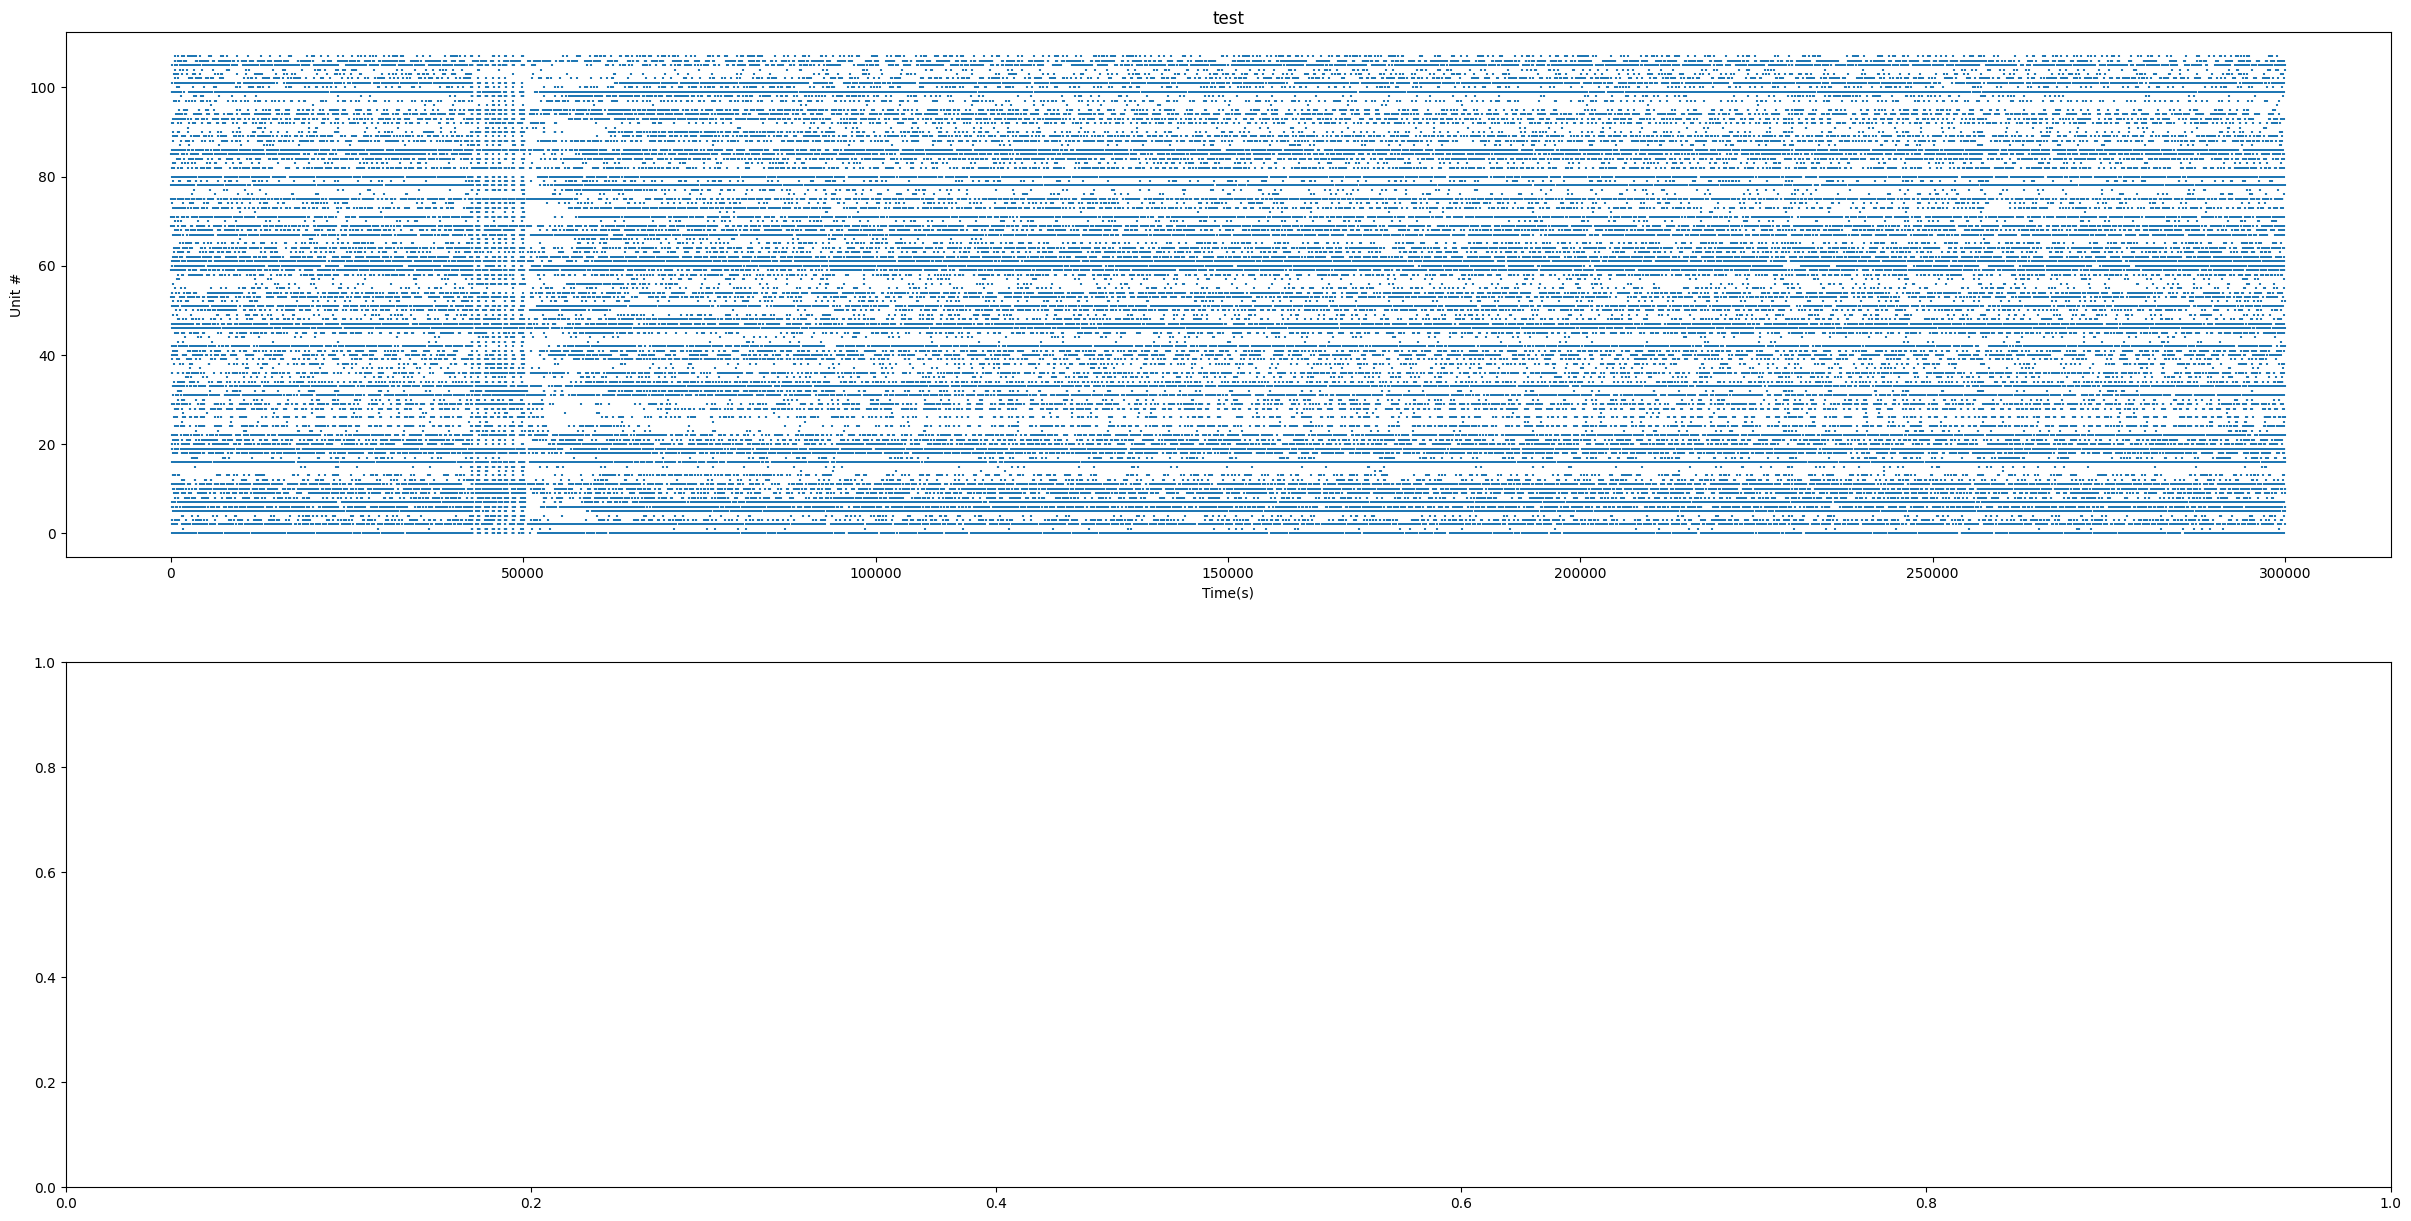

In [ ]:
fig, axs = plt.subplots( nrows=1, figsize=(30, 15) )
plotRaster(baseline_sd, "test", axs[0])

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


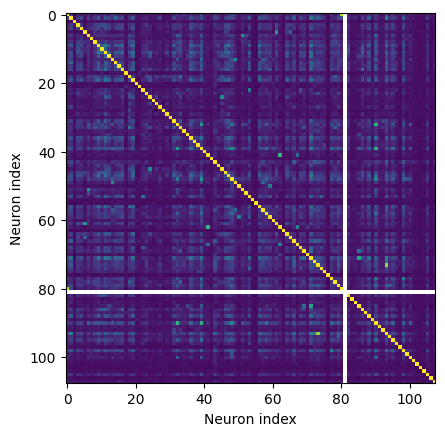

In [ ]:
correlation_plot(baseline_sd)

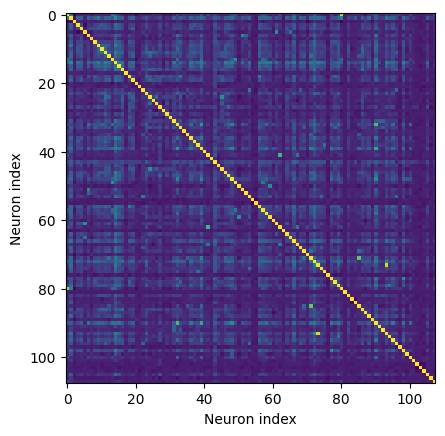

In [ ]:
STTC_plot(baseline_sd)

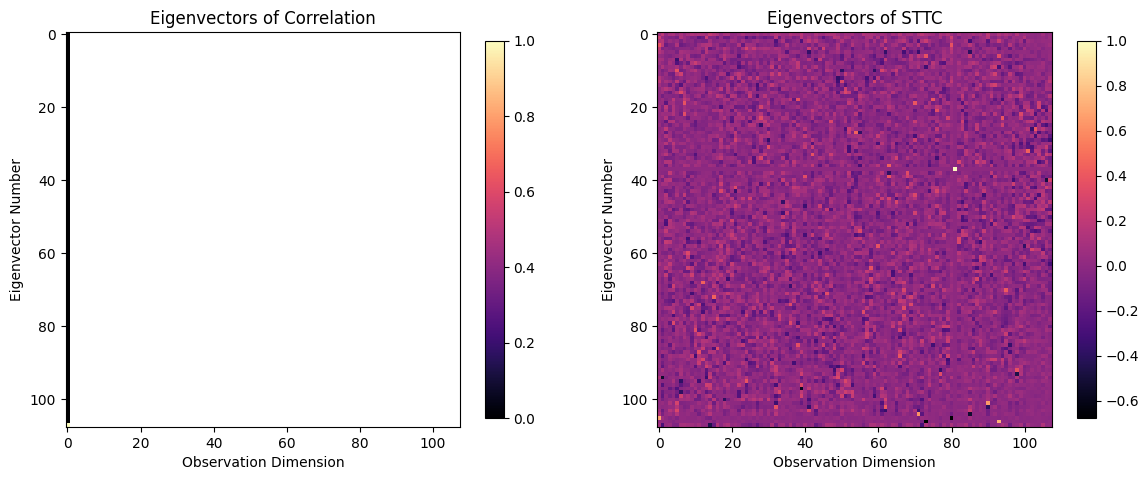

In [ ]:
plot_evectmatrix(baseline_sd)
#plot_evectmatrix(sd_post)

In a previous homework, we delved into the subject of the correlation and Spike Time Tiling Coefficient matrices. These can be useful tools to understanding the relationships of the neurons in the culture, specifically how they act together in unison. However when looking at these matrices It can be somewhat difficult to glean specific structures from them, but them being matrices, diagonal matrices to be specific, allows us to harness an important aspect of linear algebra to simplify their information. 

# Dimensional Reductions: